## RAVDESS Dataset

### "The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)" by Livingstone & Russo is licensed under CC BY-NA-SC 4.0.

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

1. Audio-only (03)
2. Speech (01)
3. Fearful (06)
4. Normal intensity (01)
5. Statement "dogs" (02)
6. 1st Repetition (01)
7. 12th Actor (12)
Female, as the actor ID number is even.

In [1]:
# load dataset from archive folder (Actor_01, Actor_02...), .wav file
import os
import pandas as pd

def load_dataset(archive_path):
    data = []
    for actor_folder in os.listdir(archive_path):
        actor_path = os.path.join(archive_path, actor_folder)
        if os.path.isdir(actor_path):
            for file_name in os.listdir(actor_path):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(actor_path, file_name)
                    # Extract data from file name
                    parts = file_name.split('-')
                    emotion_code = parts[2]
                    emotion_map = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}
                    emotion = emotion_map.get(emotion_code, 'unknown')
                    data.append({'file_path': file_path, 'emotion': emotion})
    df = pd.DataFrame(data)
    return df

In [2]:
# See dataset
df = load_dataset('archive')
print(df.head())
len(df)

                                   file_path  emotion
0  archive/Actor_11/03-01-02-02-02-01-11.wav     calm
1  archive/Actor_11/03-01-07-01-02-02-11.wav  disgust
2  archive/Actor_11/03-01-03-01-01-01-11.wav    happy
3  archive/Actor_11/03-01-06-01-01-01-11.wav  fearful
4  archive/Actor_11/03-01-03-02-02-02-11.wav    happy


1440

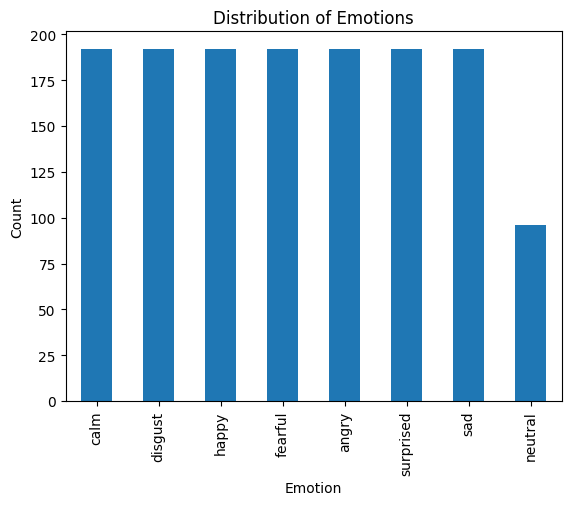

In [3]:
# Distribution of emotions graph
import matplotlib.pyplot as plt
emotion_counts = df['emotion'].value_counts()
emotion_counts.plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()

In [4]:
import numpy as np
import librosa

SR = 16000  # Sample rate
DURATION = 3.0  # Duration in seconds
SAMPLES = int(SR * DURATION)  # Total samples per audio file

In [5]:
def load_audio(path, sr=SR, samples=SAMPLES):
    y, _ = librosa.load(path, sr=sr, mono=True)
    if len(y) > samples:
        y = y[:samples]
    else:
        y = np.pad(y, (0, max(0, samples - len(y))), "constant")
    return y

In [6]:
def wav_to_logmel(path, sr=SR):
    y = load_audio(path, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, n_fft=1024, hop_length=160)
    logmel = librosa.power_to_db(mel, ref=np.max)
    return logmel

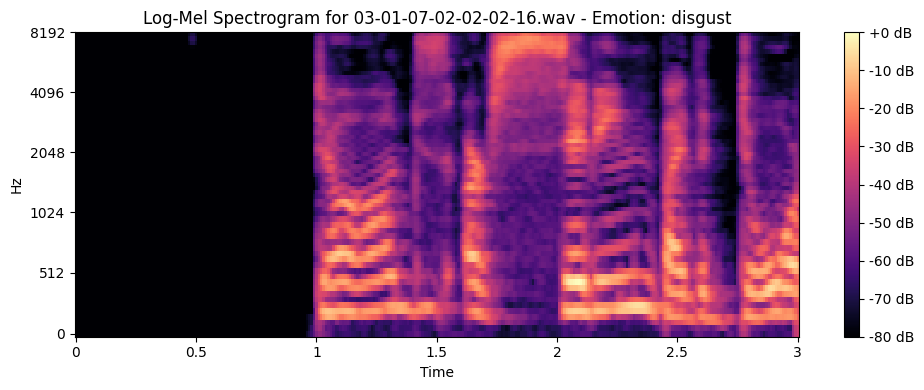

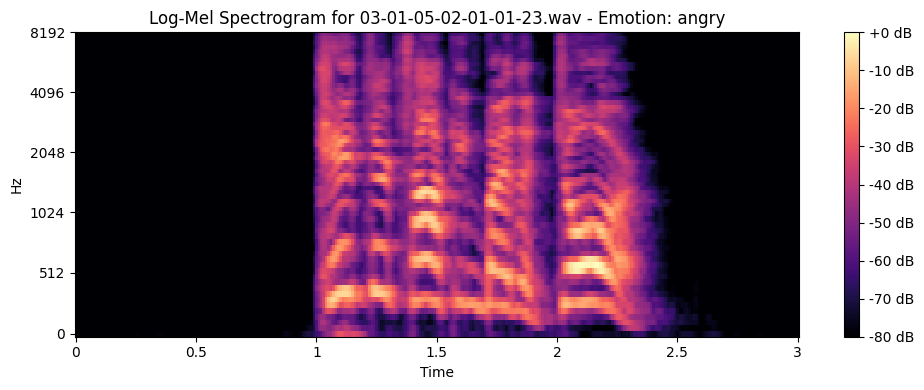

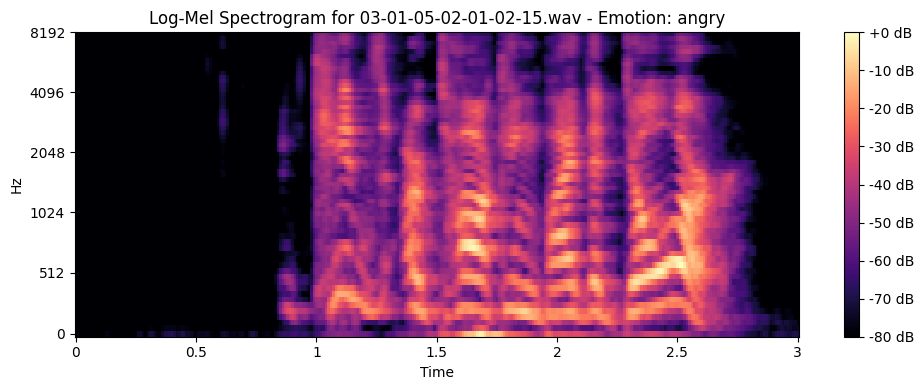

In [9]:
# Show three random log-mel spectrograms
import random
sample_files = random.sample(list(df['file_path']), 3)
for file in sample_files:
    logmel = wav_to_logmel(file)
    label = df[df['file_path'] == file]['emotion'].values[0]
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(logmel, sr=SR, hop_length=160, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log-Mel Spectrogram for {os.path.basename(file)} - Emotion: {label}')
    plt.tight_layout()
    plt.show()